In [1]:
import librosa
import numpy as np
from IPython.display import Audio
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
def sigcor_noise(filename, flip_rate = 0.5, start=0, end = -1):
    '''sigcor_noise -- add signal correlated noise to an audio file by flipping the 
        polarity of samples randomly. Note that flip_rate of 0 = no change, 1 = flip 
        the polarity of all of the samples, 0.5 means flip 1/2 of the samples (imagine 
        flipping a coin for each sample, heads leave it as it was, tails multiply it 
        by -1).  So, the maximum "noise" is with flip_rate = 0.5.
        
        inputs:
            filename - is a string containing the full path to an audio file (wav or mp3)
            flip_rate (default = 0.5) - determines the proportion of samples to flip 
                    (0.5 gives maximum noise)
            start = time (in seconds) at which to start adding noise (default is 0)
            end = time (in seconds) at which to stop adding noise (default is -1, apply 
                    to the end of the file).
            
        outputs:
            signal - a 1D array that has the altered audio from filename
            fs - the sampling rate of the signal (will be 22050)
            
        Note that librosa.load() is used to open the audio file.  It is resampled to 22050Hz 
        sampling rate, and converted to mono (if not mono already) by adding the left and right 
        channels.
    '''
    try:
        # librosa resamples to 22050 by default, and converts to mono
        signal, fs = librosa.load(filename) 
    except OSError:
        print('cannot open', signal_file)

    start = int(start*fs)
    end = int(end*fs)
        
    # this buffer randomly has 1 (don't flip) or -1 (flip) for each sample in the signal
    flip_buffer = np.array([1. if x>flip_rate else -1. for x in np.random.rand(signal.size)])
    flip_buffer[:start] = [1.]  # don't flip from 0 to start
    if end>0:
        flip_buffer[end:] = [1.]  # don't flip from "end" to signal end

    return signal*flip_buffer, fs
    

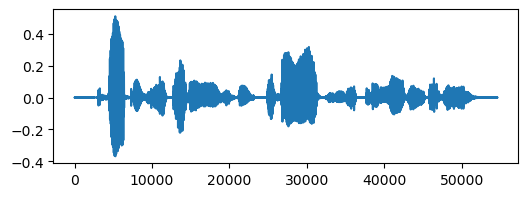

In [4]:
infile_name = 'sf3_cln.wav'   # an example file for testing

signal, fs = librosa.load(infile_name) # librosa resamples to 22050 by default, and converts to mono

plt.subplots(figsize=(6, 2))
plt.plot(signal)

Audio(signal,rate=fs)  

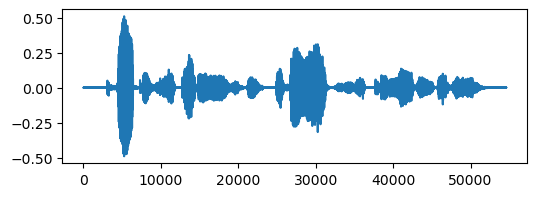

In [7]:
# The default behavior.  Flip half of the samples, randomly.  
# The waveform looks practically the same!

x,fs = sigcor_noise(infile_name)  # the default amount
plt.subplots(figsize=(6, 2))
plt.plot(x)

Audio(x,rate=fs)  

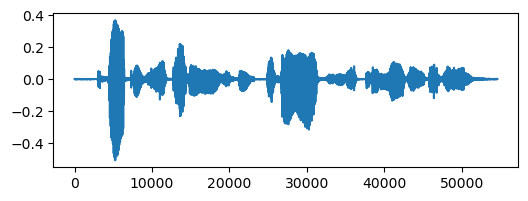

In [8]:
# flip the whole waveform (flip_rate=1.0)  -- you can only tell it has been changed 
#   by looking at the waveforms!
x,fs = sigcor_noise(infile_name,flip_rate=1.0)
plt.subplots(figsize=(6, 2))
plt.plot(x)

Audio(x,rate=fs)  

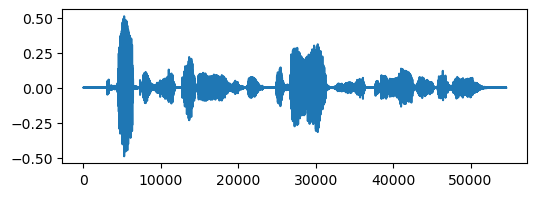

In [11]:
# Use a smaller flip_rate to get a more intelligible signal.
# Now the speech seems to be 'underneath' amplitude varying noise.

x,fs = sigcor_noise(infile_name,flip_rate=0.25)
plt.subplots(figsize=(6, 2))
plt.plot(x)

Audio(x,rate=fs)  

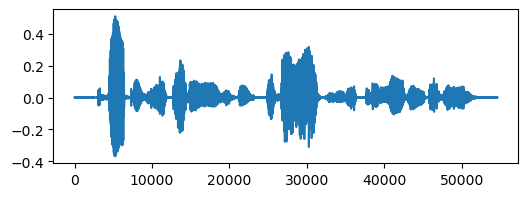

In [12]:
# distort the signal in just one spot, and by a smaller amount (flip_rate=0.25)

start = 1.086   # start and end points of one word
end = 1.442

x,fs = sigcor_noise(infile_name,flip_rate=0.25,start=start,end=end)
plt.subplots(figsize=(6, 2))
plt.plot(x)

Audio(x,rate=fs)  